In [1]:
# Macro Sentiment Chart

In [1]:
# Politican pipeline 
import plotly.plotly as py
import pandas as pd
import numpy as np
import re
from tqdm import tqdm_notebook as tqdm
import pickle
from bqplot import *
from wordcloud import WordCloud, STOPWORDS
from matplotlib import pyplot as plt
from scipy.misc import imread



In [2]:
orientation = 'right'
twitter_mask = imread('./twitter_mask_{}.png'.format(orientation), flatten=True)

In [3]:
df = pd.read_csv("../Twitter_to_vec/mass_sentiment_data.csv")

In [4]:
df.head()

,Unnamed: 0,id_str,text,coordinates,favorite_count,user,entities,hashtags,preds,w_preds,pos_proba,w_pos_proba
0,0,9.864028e+17,Poor Ralph! He wants to save the team and not ...,NaN,0.0,"{'profile_background_color': '0A0808', 'create...","{'hashtags': [{'indices': [56, 65], 'text': 'T...",['TheFlash'],0,0.0,0.019119,0.0
1,1,9.874308e+17,Another great day of bread baking @bufoodandwi...,"{'type': 'Point', 'coordinates': [-71.0565, 42...",0.0,"{'profile_background_color': 'EDECE9', 'create...","{'hashtags': [{'indices': [56, 74], 'text': 'b...","['breadmakesthemeal', 'artisanbread']",0,0.0,0.469331,0.0
2,2,9.855298e+17,“THIS IS OUR FUCKIN CITY” -Big Papi #OneBoston...,NaN,0.0,"{'profile_background_color': 'C0DEED', 'create...","{'hashtags': [{'indices': [36, 49], 'text': 'O...","['OneBostonDay', 'BostonStrong']",0,0.0,0.449416,0.0
3,3,9.815095e+17,“You may write me down in history\nWith your b...,NaN,0.0,"{'profile_background_color': 'C0DEED', 'create...","{'hashtags': [], 'urls': [{'url': 'https://t.c...",[],1,0.0,0.732388,0.0
4,4,9.870842e+17,Automating release deployments across multiple...,NaN,0.0,"{'profile_background_color': 'C0DEED', 'create...","{'hashtags': [], 'urls': [{'url': 'https://t.c...",[],1,0.0,0.937351,0.0


In [24]:
def hash_tag_sent_build(df):
    hashtags = {}
    hts = df.hashtags.values
    pos_proba = df.pos_proba.values
    classify_rat = 0
    for i in tqdm(range(len(hts))): 
        tmp_tag = list(eval(hts[i]))
        if len(tmp_tag) > 0:
            classify_rat +=1
            for j in tmp_tag:
                if j not in hashtags:
                    hashtags[j] = {0:0, 1:1, 'Count':0}
                hashtags[j][0] += (1- pos_proba[i])
                hashtags[j][1] += pos_proba[i]
                hashtags[j]['Count']+=1
    ret_df =  pd.DataFrame.from_dict(hashtags, orient='index').sort_values("Count", ascending=False)
    ret_df['pos'] = ret_df[1] / ( ret_df[0] +  ret_df[1])
    ret_df['neg'] = ret_df[0]/( ret_df[0] +  ret_df[1])
    return ret_df.loc[ret_df["Count"] > 1]

In [34]:
hash_tags = hash_tag_sent_build(df)

In [41]:

#ign_index = ['job', 'CareerArc', 'Hiring', 'hiring', 'Job', 'Jobs', 'DellJobs','CareersUnexpected',]

ign_index = [ 'CareerArc', 'Hiring', 'hiring','Jobs', 'DellJobs','CareersUnexpected',]

In [45]:
hash_tags = hash_tags.drop(ign_index)

In [46]:
#print(list(hash_tags.index.values) )

/Users/kbernardini/anaconda3/lib/python3.6/site-packages/wordcloud/wordcloud.py:370: UserWarning:

mask image should be unsigned byte between 0 and 255. Got a float array



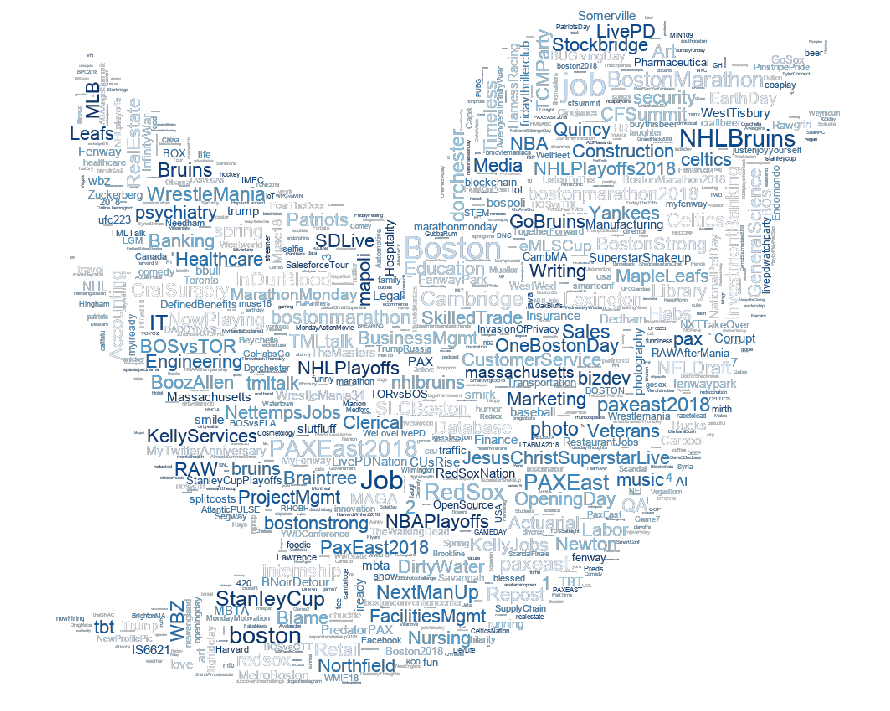

In [47]:
wordcloud = WordCloud(
                          background_color= None, #'#1dcaff',
    
                        font_path='/Library/Fonts/Arial.ttf',
                        relative_scaling =.25,
                        mode='RGBA',
                          max_words=2000,
                        width=1800,
                      height=1400,
                        colormap='Blues_r',
                        mask=twitter_mask,
                          max_font_size=40, 
                          random_state=42,
    
                         ).generate_from_frequencies(dict(hash_tags.Count))
print(wordcloud)
fig = plt.figure(figsize=(15,15))
plt.imshow(wordcloud, )
plt.axis('off')
plt.show()
fig.savefig( "mass_word_cloud.png", dpi=900)

In [48]:
print("Done")

Done
